Original Data (with duplicates and one missing value):

         Date    Carrier  Flights  OnTime  CancelRate  AvgDelayMinutes
0  2023-01-01      Delta   1200.0    88.5         1.2                9
1  2023-01-01     United    950.0    82.3         2.0               15
2  2023-01-01   American   1050.0    79.6         2.5               18
3  2023-01-01  Southwest   1300.0    91.0         0.8                7
4  2023-01-01     Alaska    800.0    85.2         1.0               12
5  2023-01-01    JetBlue      NaN    77.5         3.2               20
6  2023-01-01      Delta   1200.0    88.5         1.2                9

Number of duplicate rows: 1

Check for missing values (True means missing):

    Date  Carrier  Flights  OnTime  CancelRate  AvgDelayMinutes
0  False    False    False   False       False            False
1  False    False    False   False       False            False
2  False    False    False   False       False            False
3  False    False    False   False       F

/tmp/ipython-input-2-846834343.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["PerformanceCategory"] = df_clean["OnTime"].apply(categorize_ontime)
/tmp/ipython-input-2-846834343.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_clean, x='Carrier', y='OnTime', palette='viridis')


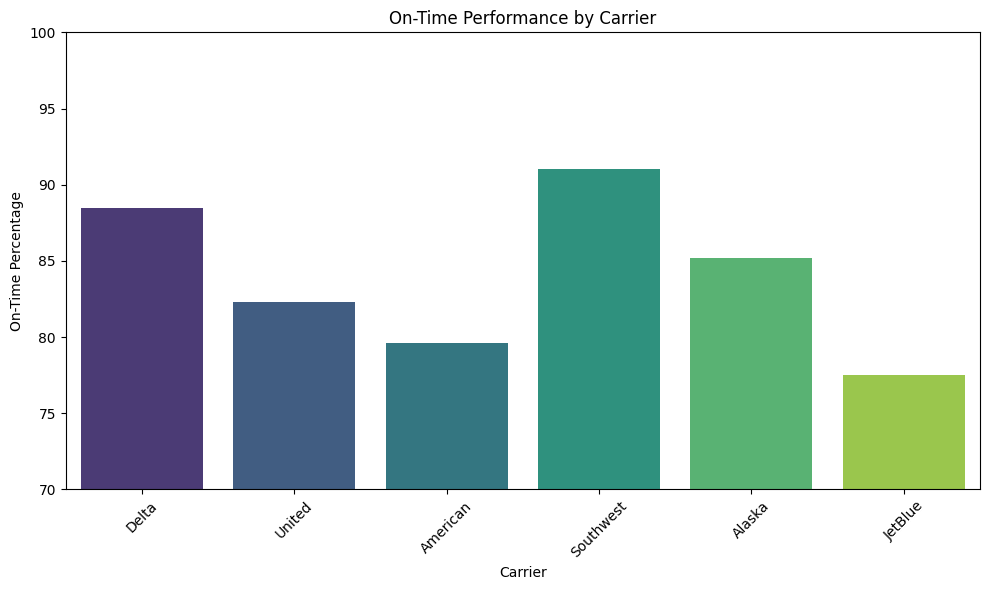

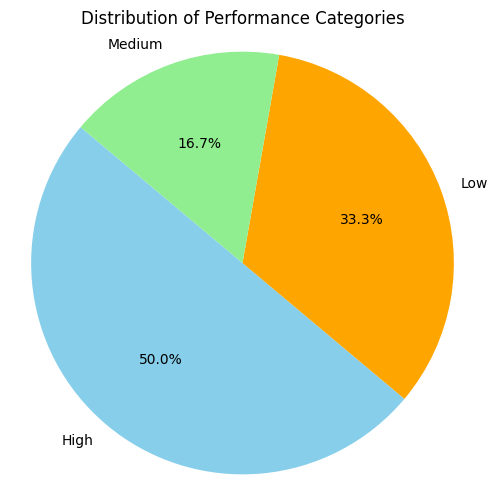

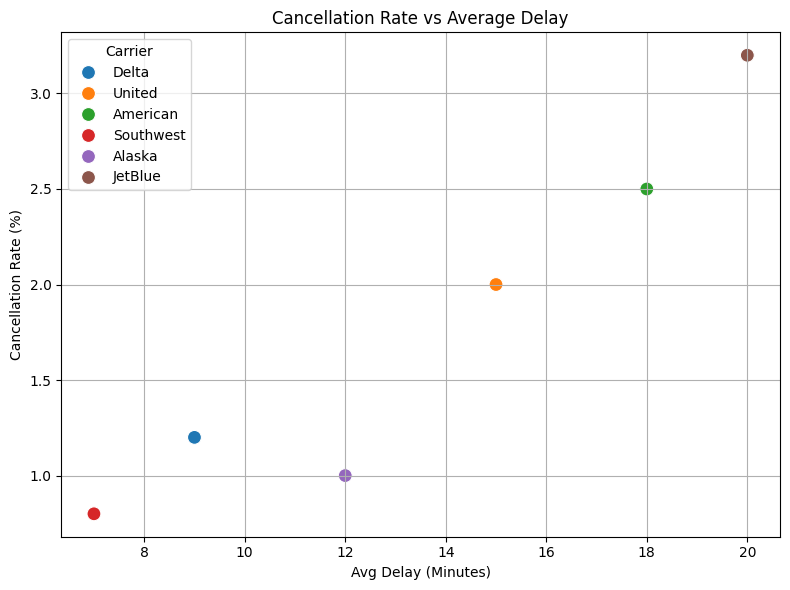

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define the dataset
data = {
    "Date": ["2023-01-01"] * 7,
    "Carrier": ["Delta", "United", "American", "Southwest", "Alaska", "JetBlue", "Delta"],
    "Flights": [1200, 950, 1050, 1300, 800, None, 1200],  # One missing value (None)
    "OnTime": [88.5, 82.3, 79.6, 91.0, 85.2, 77.5, 88.5],
    "CancelRate": [1.2, 2.0, 2.5, 0.8, 1.0, 3.2, 1.2],
    "AvgDelayMinutes": [9, 15, 18, 7, 12, 20, 9]
}
df = pd.DataFrame(data)

# Step 2: Data inspection
print("Original Data (with duplicates and one missing value):\n")
print(df)
print("\nNumber of duplicate rows:", df.duplicated().sum())
print("\nCheck for missing values (True means missing):\n")
print(df.isnull())
print("\nTotal missing values per column:\n")
print(df.isnull().sum())

# Step 3: Remove duplicates
df_clean = df.drop_duplicates()

# Step 4: Categorize OnTime performance
def categorize_ontime(value):
    if value >= 85:
        return "High"
    elif value >= 80:
        return "Medium"
    else:
        return "Low"

df_clean["PerformanceCategory"] = df_clean["OnTime"].apply(categorize_ontime)

print("\nCleaned Data (duplicates removed) with Categorization:\n")
print(df_clean)

# Step 5: Visualizations

# Bar Chart - OnTime Performance by Carrier
plt.figure(figsize=(10, 6))
sns.barplot(data=df_clean, x='Carrier', y='OnTime', palette='viridis')
plt.title('On-Time Performance by Carrier')
plt.ylabel('On-Time Percentage')
plt.ylim(70, 100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie Chart - Count of Performance Categories
plt.figure(figsize=(6, 6))
category_counts = df_clean["PerformanceCategory"].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'lightgreen'])
plt.title('Distribution of Performance Categories')
plt.axis('equal')
plt.show()

# Scatter Plot - CancelRate vs AvgDelayMinutes
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x='AvgDelayMinutes', y='CancelRate', hue='Carrier', s=100)
plt.title('Cancellation Rate vs Average Delay')
plt.xlabel('Avg Delay (Minutes)')
plt.ylabel('Cancellation Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()
